A trend in deep learning is developing generative machine learning models that can make the predictions explainable and accountable. The aim is to train several classic generative models --- restricted Boltzmann machine,  variational auto-encoder and generative adversarial networks --- with Tensorflow/Keras to generate MNIST images.

## **Restricted Boltzmann Machine (RBM) Algorithm**


*Importing required libraries*

In [1]:

import numpy as np

import keras
from keras.datasets import mnist
from keras.layers import Dense, Lambda, Input
from keras.models import Model
from keras import backend as K
from keras.losses import mse, binary_crossentropy

from sklearn.neural_network import BernoulliRBM

import matplotlib.pyplot as plt


Using TensorFlow backend.


*Change the variables within the following class to set the required RBM parameters*

In [0]:

class rbm_parameters:
  learning_rate = 0.01
  batch_size = 128
  epochs = 20


*Extracting MNIST images and labels from the dataset*

In [3]:

(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()

print("Original training images shape: "+str(mnist_x_train.shape))
print("Original training labels shape: "+str(mnist_y_train.shape))
print("Original testing images shape: "+str(mnist_x_test.shape))
print("Original testing labels shape: "+str(mnist_y_test.shape))


11493376/11490434 [==============================] - 1s 0us/step
Original training images shape: (60000, 28, 28)
Original training labels shape: (60000,)
Original testing images shape: (10000, 28, 28)
Original testing labels shape: (10000,)


*Samples from MNIST training data*

Figure(432x288)


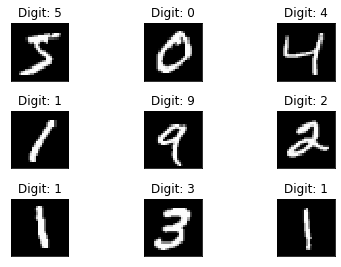

In [4]:

mnist_fig = plt.figure()

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.tight_layout()
  plt.imshow(mnist_x_train[i], cmap= 'gray', interpolation= 'none')
  plt.title('Digit: {}'.format(mnist_y_train[i]))
  plt.xticks([])
  plt.yticks([])

print(mnist_fig)


*Flattening the images in training data*

In [5]:

img_size = mnist_x_train.shape[1]

org_img_dim = img_size * img_size

mnist_x_train = np.reshape(mnist_x_train, [-1, org_img_dim]).astype('float32')/255
mnist_x_test = np.reshape(mnist_x_test, [-1, org_img_dim]).astype('float32')/255

print('Flattened training image shape: '+str(mnist_x_train.shape))
print('Flattened testing image shape: '+str(mnist_x_test.shape))


Flattened training image shape: (60000, 784)
Flattened testing image shape: (10000, 784)


#### RBM with 20 hidden layers

*Training a RBM model with the required parameter from rbm_parameters class*

In [6]:

rbm_model  = BernoulliRBM(n_components= 20, learning_rate= rbm_parameters.learning_rate, batch_size= rbm_parameters.batch_size, n_iter= rbm_parameters.epochs, verbose= 1)
rbm_model.fit(mnist_x_train)


[BernoulliRBM] Iteration 1, pseudo-likelihood = -273.13, time = 4.30s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -206.68, time = 4.97s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -197.78, time = 4.75s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -196.19, time = 4.83s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -197.28, time = 4.86s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -196.97, time = 4.86s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -196.18, time = 4.82s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -198.31, time = 4.85s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -195.27, time = 4.78s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -195.11, time = 4.83s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -198.06, time = 4.83s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -197.34, time = 4.82s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -196.98, time = 4.85s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -197.98, time = 4.84s
[BernoulliRBM] 

BernoulliRBM(batch_size=128, learning_rate=0.01, n_components=20, n_iter=20,
             random_state=None, verbose=1)

In [0]:

digits = mnist_x_train[:50].copy()
for each_iter in range(1000):
  for each_digit in range(50):
    digits[each_digit] = rbm_model.gibbs(digits[each_digit])


*Plotting the learning components of the hidden layers*

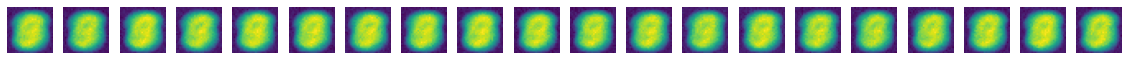

In [8]:

plt.figure(figsize=(20, 20))
for i, comp in enumerate(rbm_model.components_):
  plt.subplot(20, 20, i + 1)
  plt.imshow(comp.reshape((28, 28)))
  plt.axis('off')


*Plotting 50 sample reconstructions*

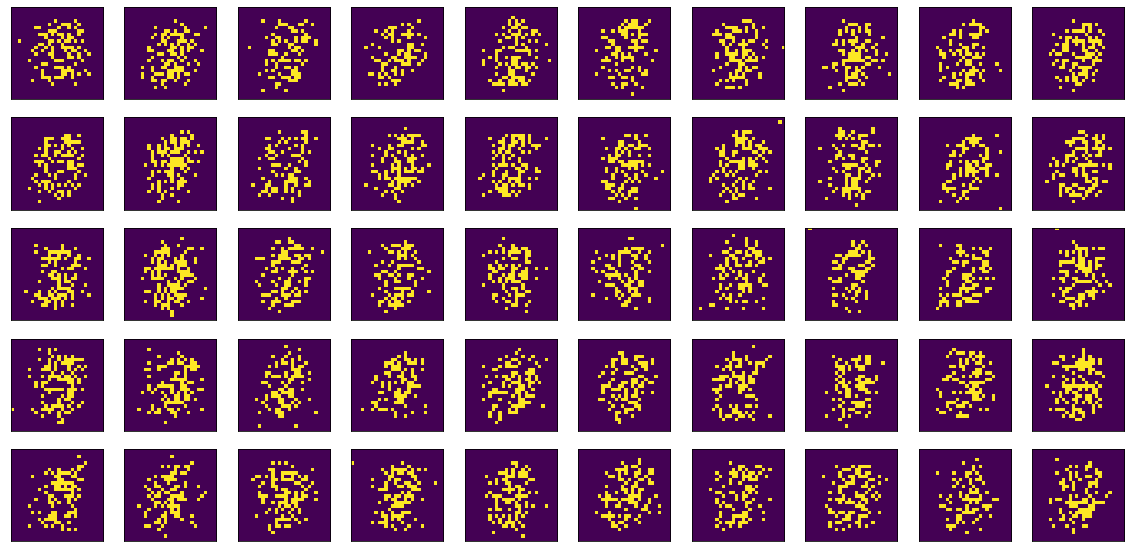

In [9]:

plt.figure(figsize=(20,20))
for i, comp in enumerate(digits):
  plt.subplot(10,10,i+1)
  plt.imshow(comp.reshape(28,28))
  plt.xticks(())
  plt.yticks(())


#### RBM with 100 hidden layers

*Training a RBM model with the required parameter from rbm_parameters class*

In [10]:

rbm_model  = BernoulliRBM(n_components= 100, learning_rate= rbm_parameters.learning_rate, batch_size= rbm_parameters.batch_size, n_iter= rbm_parameters.epochs, verbose= 1)
rbm_model.fit(mnist_x_train)


[BernoulliRBM] Iteration 1, pseudo-likelihood = -194.31, time = 6.61s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -166.90, time = 8.24s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -152.98, time = 8.26s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -143.68, time = 8.19s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -139.94, time = 8.25s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -135.15, time = 8.17s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -128.72, time = 8.18s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -126.16, time = 8.27s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -122.14, time = 8.27s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -120.70, time = 8.24s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -116.57, time = 8.22s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -114.77, time = 8.35s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -115.53, time = 8.29s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -110.70, time = 8.24s
[BernoulliRBM] 

BernoulliRBM(batch_size=128, learning_rate=0.01, n_components=100, n_iter=20,
             random_state=None, verbose=1)

In [0]:

digits = mnist_x_train[:50].copy()
for each_iter in range(1000):
  for each_digit in range(50):
    digits[each_digit] = rbm_model.gibbs(digits[each_digit])


*Plotting the learning components of the hidden layers*

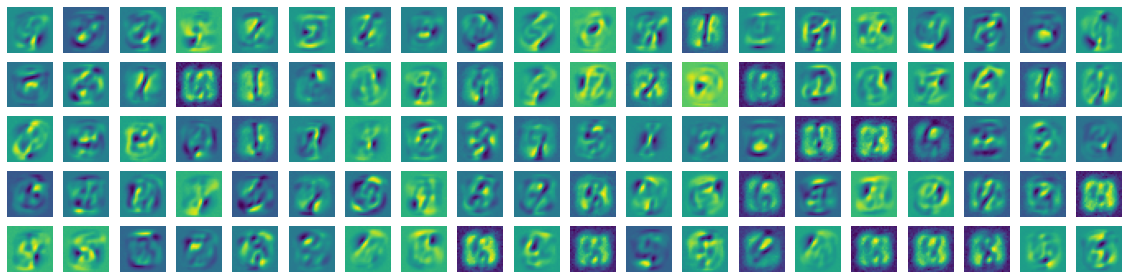

In [12]:

plt.figure(figsize=(20, 20))
for i, comp in enumerate(rbm_model.components_):
  plt.subplot(20, 20, i + 1)
  plt.imshow(comp.reshape((28, 28)))
  plt.axis('off')


*Plotting 50 sample reconstructions*

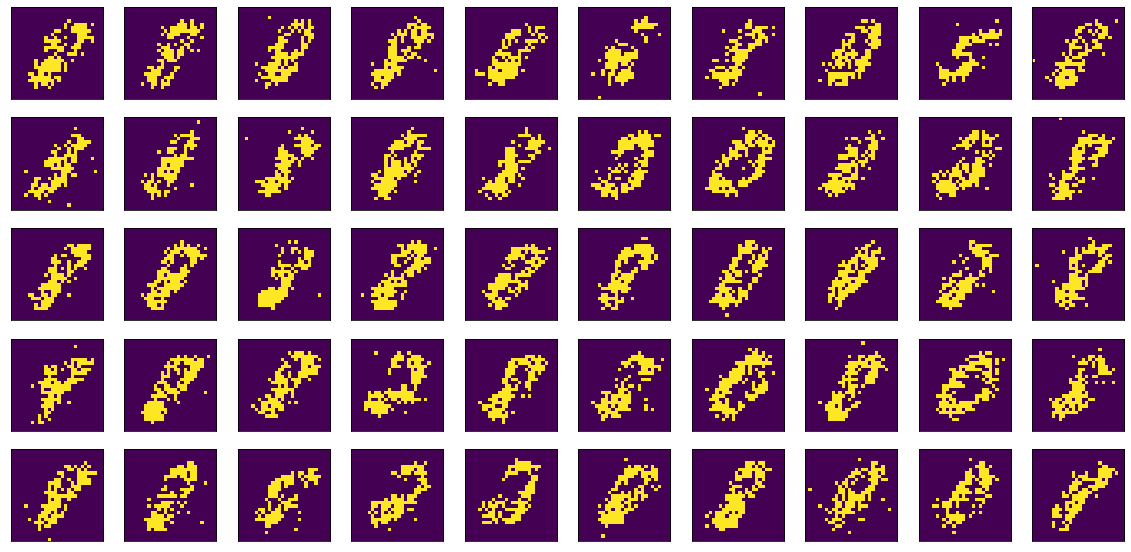

In [13]:

plt.figure(figsize=(20,20))
for i, comp in enumerate(digits):
  plt.subplot(10,10,i+1)
  plt.imshow(comp.reshape(28,28))
  plt.xticks(())
  plt.yticks(())


#### RBM with 500 hidden layers

*Training a RBM model with the required parameter from rbm_parameters class*

In [14]:

rbm_model  = BernoulliRBM(n_components= 500, learning_rate= rbm_parameters.learning_rate, batch_size= rbm_parameters.batch_size, n_iter= rbm_parameters.epochs, verbose= 1)
rbm_model.fit(mnist_x_train)


[BernoulliRBM] Iteration 1, pseudo-likelihood = -155.71, time = 16.53s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -134.14, time = 23.08s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -123.28, time = 23.11s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -113.76, time = 22.99s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -107.43, time = 22.92s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -101.97, time = 22.88s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -98.53, time = 22.68s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -95.08, time = 22.77s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -93.25, time = 22.71s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -91.21, time = 22.72s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -87.33, time = 22.77s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -85.68, time = 22.77s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -84.62, time = 22.71s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -84.36, time = 22.61s
[Bernoull

BernoulliRBM(batch_size=128, learning_rate=0.01, n_components=500, n_iter=20,
             random_state=None, verbose=1)

In [0]:

digits = mnist_x_train[:50].copy()
for each_iter in range(1000):
  for each_digit in range(50):
    digits[each_digit] = rbm_model.gibbs(digits[each_digit])


*Plotting the learning components of the hidden layers*

ValueError: ignored

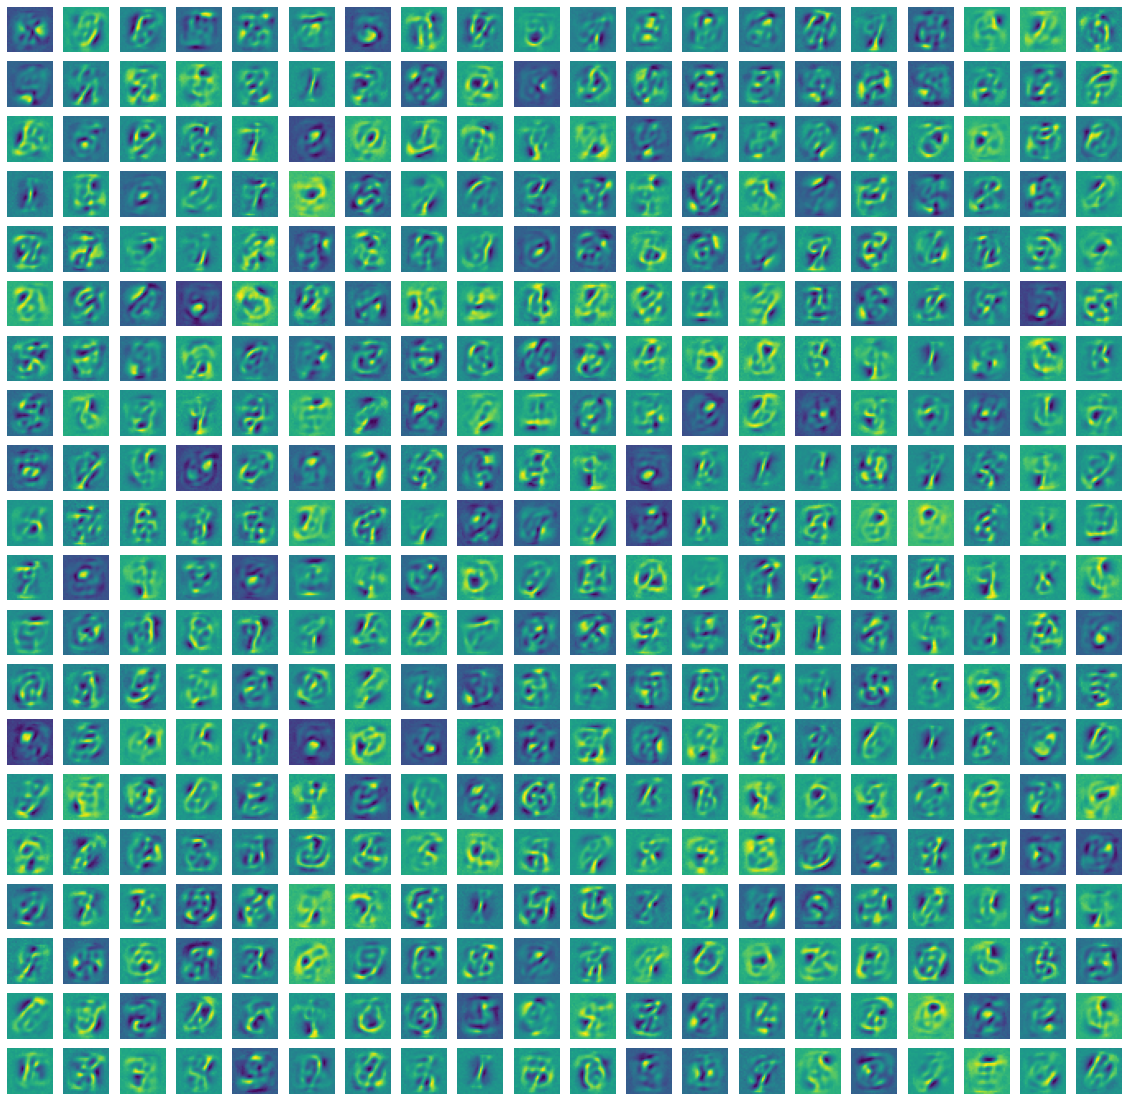

In [17]:

plt.figure(figsize=(20, 20))
for i, comp in enumerate(rbm_model.components_):
    plt.subplot(20, 20, i + 1)
    plt.imshow(comp.reshape((28, 28)))
    plt.axis('off')


*Plotting 50 sample reconstructions*

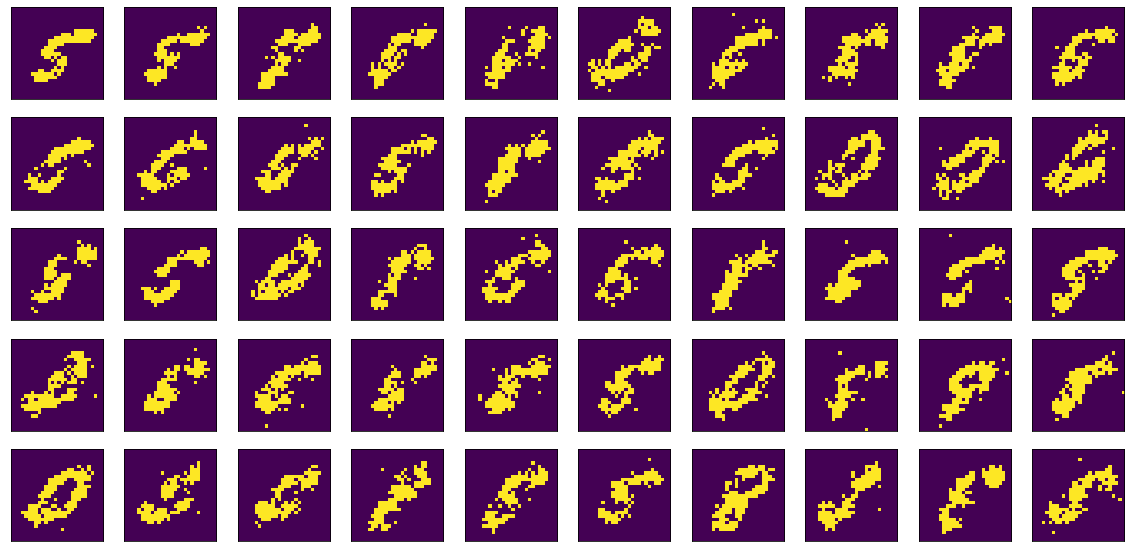

In [18]:

plt.figure(figsize=(20,20))
for i, comp in enumerate(digits):
  plt.subplot(10,10,i+1)
  plt.imshow(comp.reshape(28,28))
  plt.xticks(())
  plt.yticks(())


*Observation :* As the number of hidden layers increases, the reconstruction component also becomes more crisper

## **Variational Autoencoder (VAE) Algorithm**

*Change the variables within the following class to set the required model parameters*

In [0]:

class model_parameters:
  hidden_dim = 256
  # batch_size = 128
  batch_size = 256
  epochs = 50


*Extracting MNIST images and labels from the dataset*

In [20]:

(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()

print("Original training images shape: "+str(mnist_x_train.shape))
print("Original training labels shape: "+str(mnist_y_train.shape))
print("Original testing images shape: "+str(mnist_x_test.shape))
print("Original testing labels shape: "+str(mnist_y_test.shape))

reconstruction_data = (mnist_x_test, mnist_y_test)


Original training images shape: (60000, 28, 28)
Original training labels shape: (60000,)
Original testing images shape: (10000, 28, 28)
Original testing labels shape: (10000,)


*Samples from MNIST training data*

Figure(432x288)


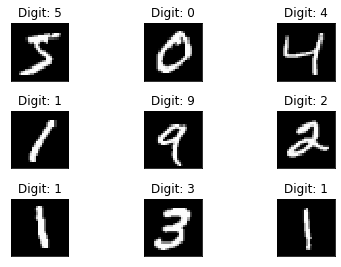

In [21]:

mnist_fig = plt.figure()

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.tight_layout()
  plt.imshow(mnist_x_train[i], cmap= 'gray', interpolation= 'none')
  plt.title('Digit: {}'.format(mnist_y_train[i]))
  plt.xticks([])
  plt.yticks([])

print(mnist_fig)


*Flattening the images in training data*

In [22]:

img_size = mnist_x_train.shape[1]

org_img_dim = img_size * img_size

mnist_x_train = np.reshape(mnist_x_train, [-1, org_img_dim]).astype('float32')/255
mnist_x_test = np.reshape(mnist_x_test, [-1, org_img_dim]).astype('float32')/255

print('Flattened training image shape: '+str(mnist_x_train.shape))
print('Flattened testing image shape: '+str(mnist_x_test.shape))


Flattened training image shape: (60000, 784)
Flattened testing image shape: (10000, 784)


*The following function samples data from the mean vector and the variance vector*

In [0]:

def sampling(z_layers):
    mean, variance = z_layers
    batch = K.shape(mean)[0]
    dim = K.int_shape(mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    sampled_data = mean + K.exp(0.5 * variance) * epsilon

    return sampled_data


*The following function builds the encoder NN*

In [0]:

def build_encoder(input_layer, hidden_dim, code_unit):
  hidden_layer = Dense(hidden_dim, activation= 'relu')(input_layer)
  mean_layer = Dense(code_unit)(hidden_layer)
  variance_layer = Dense(code_unit)(hidden_layer)
  
  sampling_layer = Lambda(sampling, output_shape = (code_unit,))([mean_layer, variance_layer])

  encoder = Model(input_layer, [mean_layer, variance_layer, sampling_layer])

  kl = 1 + variance_layer - K.square(mean_layer) - K.exp(variance_layer)
  kl = K.sum(kl, axis= 1)
  kl = kl * (-0.5)

  return (encoder, kl)


*The following function builds the decoder NN*

In [0]:

def build_decoder(output_dim, hidden_dim, code_unit):
  input_layer = Input(shape= (code_unit,))
  hidden_layer = Dense(hidden_dim, activation = 'relu')(input_layer)
  output_layer = Dense(output_dim, activation = 'sigmoid')(hidden_layer)

  decoder = Model(input_layer, output_layer)

  return decoder


*The following function plots the reconstructed images (i.e.) decoder output*

In [0]:

def plot_reconstruction(test_data, decoder, code):
  x, y = test_data

  imgs = 10
  fig = np.zeros((28 * imgs, 28 * imgs))

  x_axis = np.linspace(-5, 5, imgs)
  y_axis = np.linspace(-5, 5, imgs)[::-1]

  for i, i_y in enumerate(y_axis):
    for j, i_x in enumerate(x_axis):
      sampled_z = np.array([[i_x, i_y]])
      decoder_op = decoder.predict(sampled_z)
      fig[i*28: (i+1)*28, j*28: (j+1)*28] = decoder_op[0].reshape(28, 28) # Reconstructed image

  plt.figure(figsize=(10,10))

  range_start = 28//2
  range_end = (imgs - 1)*28 + range_start + 1

  pixel_range = np.arange(range_start, range_end, 28)

  sample_x = np.round(x_axis, 1)
  sample_y = np.round(y_axis, 1)

  plt.xticks(pixel_range, sample_x)
  plt.yticks(pixel_range, sample_y)

  plt.imshow(fig)

  plt.show()


#### VAE for 2 code units

*Initiating encoder, decoder & VAE model*

In [27]:

code_unit = 2

input_layer_2 = Input(shape=(org_img_dim, ))
encoder_2, kl_div_2 = build_encoder(input_layer = input_layer_2, hidden_dim = model_parameters.hidden_dim, code_unit = code_unit)
encoder_2.summary()

decoder_2 = build_decoder(output_dim = org_img_dim, hidden_dim = model_parameters.hidden_dim, code_unit = code_unit)
decoder_2.summary()

output_layer_2 = decoder_2(encoder_2(input_layer_2)[2])

vae_2 = Model(input_layer_2, output_layer_2)
vae_2.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          200960      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 2)            514         dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 2)            514         dense_1[0][0]                    
____________________________________________________________________________________________

*Training the VAE*

In [28]:

io_loss_2 = binary_crossentropy(input_layer_2, output_layer_2)

io_loss_2 = io_loss_2 * org_img_dim

vae_loss = K.mean(io_loss_2 + kl_div_2)

vae_2.add_loss(vae_loss)
vae_2.compile(optimizer = 'adam')
vae_2.summary()

vae_2.fit(mnist_x_train, epochs= model_parameters.epochs, batch_size= model_parameters.batch_size, validation_data= (mnist_x_test, None))


/usr/local/lib/python3.6/dist-packages/keras/engine/training_utils.py:819: UserWarning: Output model_2 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to model_2.
  'be expecting any data to be passed to {0}.'.format(name))


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
model_1 (Model)              [(None, 2), (None, 2), (N 201988    
_________________________________________________________________
model_2 (Model)              (None, 784)               202256    
Total params: 404,244
Trainable params: 404,244
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 59us/step - loss: 226.3921 - val_loss: 187.3547
Epoch 2/50
60000/60000 [==============================] - 2s 30us/step - loss: 181.7606 - val_loss: 175.7276
Epoch 3/50
60000/60000 [==============================] - 2s 30us/step - loss: 173.5171 - val_loss: 170.7289
Epoch 

*Plotting the reconstructed image*

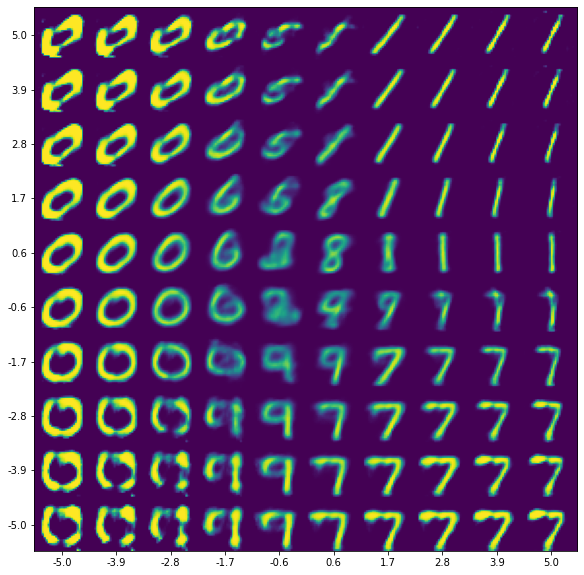

In [29]:

plot_reconstruction(reconstruction_data, decoder_2, code_unit)


#### VAE for 8 code units

*Initiating encoder & decoder*

In [30]:

code_unit = 8

input_layer_8 = Input(shape=(org_img_dim,))
encoder_8, kl_div_8 = build_encoder(input_layer = input_layer_8, hidden_dim = model_parameters.hidden_dim, code_unit = code_unit)
encoder_8.summary()

decoder_8 = build_decoder(output_dim = org_img_dim, hidden_dim = model_parameters.hidden_dim, code_unit = code_unit)
decoder_8.summary()

output_layer_8 = decoder_8(encoder_8(input_layer_8)[2])

vae_8 = Model(input_layer_8, output_layer_8)
vae_8.summary()


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 256)          200960      input_3[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 8)            2056        dense_6[0][0]                    
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 8)            2056        dense_6[0][0]                    
____________________________________________________________________________________________

*Training the VAE*

In [31]:

io_loss_8 = mse(input_layer_8, output_layer_8)

io_loss_8 = io_loss_8 * org_img_dim

vae_loss = K.mean(io_loss_8 + kl_div_8)

vae_8.add_loss(vae_loss)
vae_8.compile(optimizer = 'adam')
vae_8.summary()

vae_8.fit(mnist_x_train, epochs= model_parameters.epochs, batch_size= model_parameters.batch_size, validation_data= (mnist_x_test, None))


/usr/local/lib/python3.6/dist-packages/keras/engine/training_utils.py:819: UserWarning: Output model_5 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to model_5.
  'be expecting any data to be passed to {0}.'.format(name))


Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
model_4 (Model)              [(None, 8), (None, 8), (N 205072    
_________________________________________________________________
model_5 (Model)              (None, 784)               203792    
Total params: 408,864
Trainable params: 408,864
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 31us/step - loss: 57.3016 - val_loss: 40.8585
Epoch 2/50
60000/60000 [==============================] - 2s 28us/step - loss: 38.5334 - val_loss: 36.3695
Epoch 3/50
60000/60000 [==============================] - 2s 28us/step - loss: 35.6330 - val_loss: 34.6986
Epoch 4/50
6

*Plotting the reconstructed images*

In [0]:

plot_reconstruction(reconstruction_data, decoder_8, code_unit)


#### VAE for 16 code units

*Initiating encoder & decoder*

In [32]:

code_unit = 16

input_layer_16 = Input(shape=(org_img_dim,))
encoder_16, kl_div_16 = build_encoder(input_layer = input_layer_16, hidden_dim = model_parameters.hidden_dim, code_unit = code_unit)
encoder_16.summary()

decoder_16 = build_decoder(output_dim = org_img_dim, hidden_dim = model_parameters.hidden_dim, code_unit = code_unit)
decoder_16.summary()

output_layer_16 = decoder_16(encoder_16(input_layer_16)[2])

vae_16 = Model(input_layer_16, output_layer_16)
vae_16.summary()


Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 256)          200960      input_5[0][0]                    
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 16)           4112        dense_11[0][0]                   
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 16)           4112        dense_11[0][0]                   
____________________________________________________________________________________________

*Training the VAE*

In [33]:

io_loss_2 = mse(input_layer_2, output_layer_2)

io_loss_2 = io_loss_2 * org_img_dim

vae_loss = K.mean(io_loss_2 + kl_div_2)

vae_2.add_loss(vae_loss)
vae_2.compile(optimizer = 'adam')
vae_2.summary()

vae_2.fit(mnist_x_train, epochs= model_parameters.epochs, batch_size= model_parameters.batch_size, validation_data= (mnist_x_test, None))


/usr/local/lib/python3.6/dist-packages/keras/engine/training_utils.py:819: UserWarning: Output model_2 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to model_2.
  'be expecting any data to be passed to {0}.'.format(name))


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
model_1 (Model)              [(None, 2), (None, 2), (N 201988    
_________________________________________________________________
model_2 (Model)              (None, 784)               202256    
Total params: 404,244
Trainable params: 404,244
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 35us/step - loss: 187.1821 - val_loss: 190.2385
Epoch 2/50
60000/60000 [==============================] - 2s 32us/step - loss: 186.9640 - val_loss: 190.2071
Epoch 3/50
60000/60000 [==============================] - 2s 32us/step - loss: 186.8479 - val_loss: 190.1662
Epoch 

*Plotting the reconstructed images*

In [0]:

plot_reconstruction(reconstruction_data, decoder_16, code_unit)
